<a href="https://colab.research.google.com/github/Kwagalakwe-Grace/Scip-exam-project/blob/main/Tensor_flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
from google.colab import drive
import tensorflow as tf
import numpy as np
import PIL
import cv2
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras import datasets, layers, models



In [38]:
#mounting google drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


(-0.5, 390.5, 487.5, -0.5)

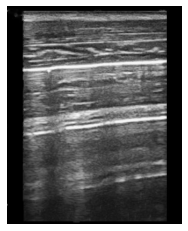

In [54]:
img= image.load_img("/content/drive/MyDrive/known_images/Training/normal/normal_1.png")
plt.imshow(img)
plt.axis("off")

In [5]:
training= ImageDataGenerator(rescale=1/255, validation_split =0.2)

validation = ImageDataGenerator(rescale=1/255, validation_split =0.2)

In [15]:
train_dataset = training.flow_from_directory('/content/drive/MyDrive/kwn_images/Training',
                                         target_size=(200,200),
                                         batch_size=3,
                                         class_mode='binary')
validating_dataset = validation.flow_from_directory('/content/drive/MyDrive/kwn_images/Training',
                                         target_size=(200,200),
                                         batch_size=3,
                                         class_mode='binary')

Found 605 images belonging to 2 classes.
Found 605 images belonging to 2 classes.


In [16]:
train_dataset.class_indices

{'normal': 0, 'sick': 1}

In [18]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [44]:
model=tf.keras.models.Sequential([tf.keras.layers.Convolution2D(16,(3,3),activation='relu', input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Convolution2D(32,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Convolution2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(512, activation='relu'),
                                  tf.keras.layers.Dense(1,activation='sigmoid')
                                  ])

In [45]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 99, 99, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 48, 48, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 23, 23, 64)      

In [46]:
model.compile(loss='binary_crossentropy',
             optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001),
             metrics = ['accuracy'])

In [34]:
model = model.fit(train_dataset, epochs=10, 
                    validation_data=validating_dataset)


Epoch 1/10
202/202 [==============================] - 102s 500ms/step - loss: 0.0747 - accuracy: 0.9917 - val_loss: 1.0688e-07 - val_accuracy: 1.0000
Epoch 2/10
202/202 [==============================] - 96s 474ms/step - loss: 0.1084 - accuracy: 0.9950 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 3/10
202/202 [==============================] - 96s 474ms/step - loss: 0.0080 - accuracy: 0.9983 - val_loss: 0.0188 - val_accuracy: 0.9950
Epoch 4/10
202/202 [==============================] - 99s 488ms/step - loss: 0.0212 - accuracy: 0.9967 - val_loss: 2.9863e-06 - val_accuracy: 1.0000
Epoch 5/10
202/202 [==============================] - 95s 472ms/step - loss: 1.5852e-06 - accuracy: 1.0000 - val_loss: 5.6353e-10 - val_accuracy: 1.0000
Epoch 6/10
202/202 [==============================] - 96s 475ms/step - loss: 5.5346e-10 - accuracy: 1.0000 - val_loss: 5.0390e-11 - val_accuracy: 1.0000
Epoch 7/10
202/202 [==============================] - 96s 475ms/step - loss: 4.9211e-11 - accuracy: 1.000

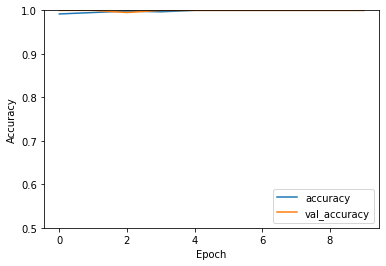

In [40]:
plt.plot(model.history['accuracy'], label='accuracy')
plt.plot(model.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
